In [86]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [87]:
pumpkins.isnull().sum()

new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


In [98]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2 #total price dibagi 2
month = pd.DatetimeIndex(pumpkins['Date']).month
print(price)

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64


In [99]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

print(new_pumpkins)

      Month               Package  Low Price  High Price   Price
70        9  1 1/9 bushel cartons      15.00        15.0  15.000
71        9  1 1/9 bushel cartons      18.00        18.0  18.000
72       10  1 1/9 bushel cartons      18.00        18.0  18.000
73       10  1 1/9 bushel cartons      17.00        17.0  17.000
74       10  1 1/9 bushel cartons      15.00        15.0  15.000
...     ...                   ...        ...         ...     ...
1738      9    1/2 bushel cartons      15.00        15.0  15.000
1739      9    1/2 bushel cartons      13.75        15.0  14.375
1740      9    1/2 bushel cartons      10.75        15.0  12.875
1741      9    1/2 bushel cartons      12.00        12.0  12.000
1742      9    1/2 bushel cartons      12.00        12.0  12.000

[415 rows x 5 columns]


In [100]:
#kolom package aneh, kudu diubah dengan cara memisahkan tiap string dengan spasi buat dapetin porsi per nya itu
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
print(pumpkins)

                   Package     Date  Low Price  High Price
70    1 1/9 bushel cartons  9/24/16      15.00        15.0
71    1 1/9 bushel cartons  9/24/16      18.00        18.0
72    1 1/9 bushel cartons  10/1/16      18.00        18.0
73    1 1/9 bushel cartons  10/1/16      17.00        17.0
74    1 1/9 bushel cartons  10/8/16      15.00        15.0
...                    ...      ...        ...         ...
1738    1/2 bushel cartons  9/30/16      15.00        15.0
1739    1/2 bushel cartons  9/30/16      13.75        15.0
1740    1/2 bushel cartons  9/30/16      10.75        15.0
1741    1/2 bushel cartons  9/30/16      12.00        12.0
1742    1/2 bushel cartons  9/30/16      12.00        12.0

[415 rows x 4 columns]


In [101]:
# nah udah dapet
# kita dapetin porsi per nya itu lalu di normalisasikan ke bentuk angka yang sebenernya

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


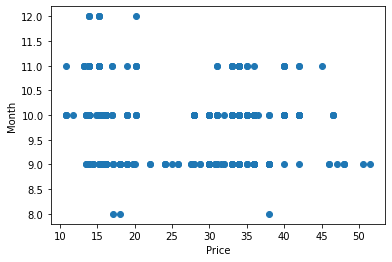

In [102]:
# Mengetahui variasi harga pumpkins per bulan dalam bentuk scatter
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.show()

#tapi kurang informatip, supaya lebih informatipppp

Text(0, 0.5, 'Pumpkin Price')

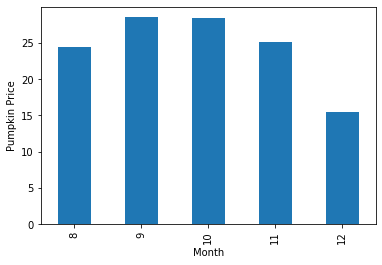

In [103]:
#dalam bentuk chart ajaaa, kita ketahui variasi harga pumpkins per bulannyaa
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')

In [108]:
from sklearn.preprocessing import LabelEncoder

new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
# print(new_pumpkins)
print(new_pumpkins['Package'].corr(new_pumpkins['Price']))

      Month  Package  Low Price  High Price  Price
70        1        0          5           3  13.50
71        1        0         10           7  16.20
72        2        0         10           7  16.20
73        2        0          9           6  15.30
74        2        0          5           3  13.50
...     ...      ...        ...         ...    ...
1738      1        2          5           3  30.00
1739      1        2          3           3  28.75
1740      1        2          0           3  25.75
1741      1        2          1           0  24.00
1742      1        2          1           0  24.00

[415 rows x 5 columns]
0.6088482822590107


In [105]:
#buang data kosong
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Package     415 non-null    int64  
 2   Low Price   415 non-null    int64  
 3   High Price  415 non-null    int64  
 4   Price       415 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 35.6 KB


In [106]:
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

print(lin_pumpkins)

      Package  Price
70          0  13.50
71          0  16.20
72          0  16.20
73          0  15.30
74          0  13.50
...       ...    ...
1738        2  30.00
1739        2  28.75
1740        2  25.75
1741        2  24.00
1742        2  24.00

[415 rows x 2 columns]


In [109]:
#tetapkan X dan y
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy_score = model.score(X_train, y_train)
#this is not soo accurate
print('Model Accuracy : ', accuracy_score)

Model Accuracy :  0.33487841320379996


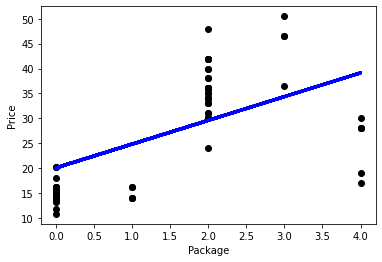

In [111]:
# lets see the plot
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.show()

In [114]:
model.predict([[2.75]])

array([[33.16833759]])